In [7]:
from __future__ import division
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader.data import DataReader
from datetime import datetime


In [8]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [10]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [15]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,91.489910,88.904084,90.176275,90.259482,1.500380e+08,89.653332
std,20.817366,20.146032,20.683135,20.439410,7.705750e+07,20.793234
min,57.125000,53.152500,57.020000,56.092499,2.045080e+07,55.291519
25%,74.051250,71.556252,72.423748,73.021248,1.033940e+08,71.893490
50%,81.555000,80.574997,81.097504,81.279999,1.354452e+08,80.550545
75%,115.270000,110.994999,113.497501,112.915001,1.850404e+08,112.720531
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-12-02 to 2020-11-27
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


# Time sreise

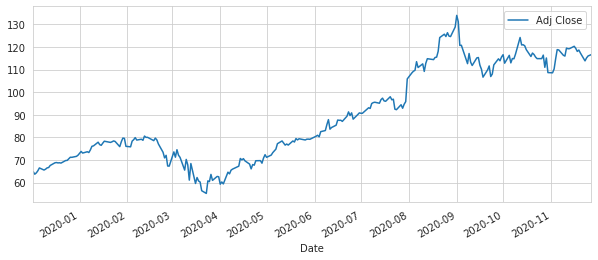

In [17]:
AAPL['Adj Close'].plot(legend=True, figsize=(10, 4))

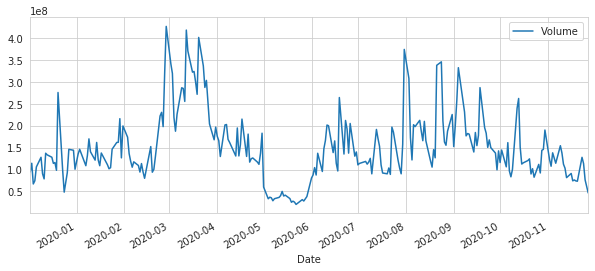

In [18]:
AAPL['Volume'].plot(legend=True, figsize=(10, 4))

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

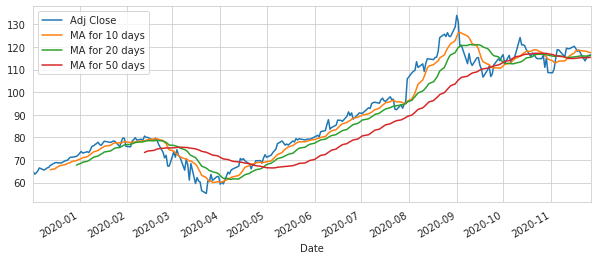

In [23]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

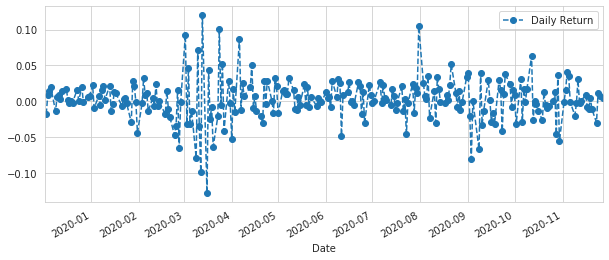

In [24]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10, 4), legend=True, linestyle='--', marker='o')

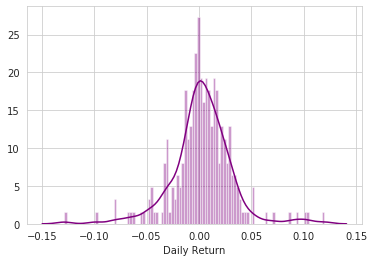

In [25]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

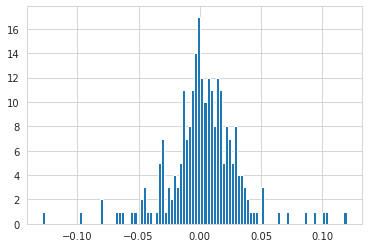

In [26]:
AAPL['Daily Return'].hist(bins=100)

In [27]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [28]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-02,64.942841,1289.920044,147.982330,1781.599976
2019-12-03,63.784916,1295.280029,147.744843,1769.959961
2019-12-04,64.347893,1320.540039,148.279175,1760.689941
2019-12-05,65.291946,1328.130005,148.358353,1740.479980
2019-12-06,66.553131,1340.619995,150.159271,1751.599976


In [29]:
tech_rets = closing_df.pct_change()

In [30]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-02,NaN,NaN,NaN,NaN
2019-12-03,-0.017830,0.004155,-0.001605,-0.006533
2019-12-04,0.008826,0.019502,0.003617,-0.005237
2019-12-05,0.014671,0.005748,0.000534,-0.011478
2019-12-06,0.019316,0.009404,0.012139,0.006389


# Correlation Analysis

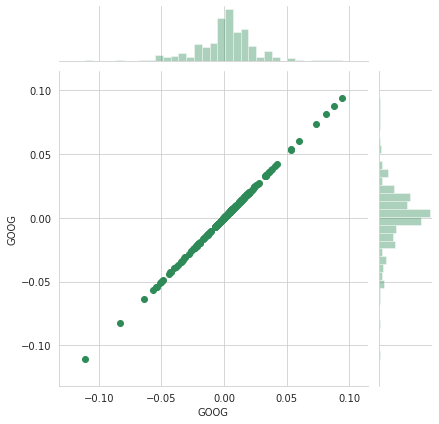

In [31]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

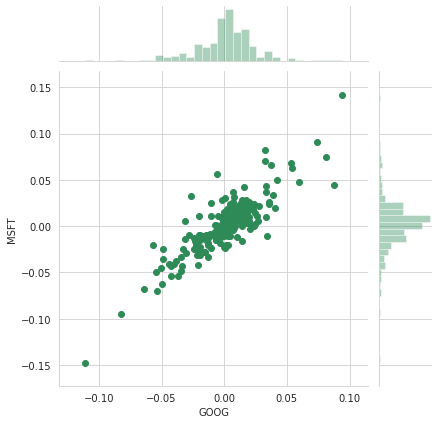

In [32]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

In [34]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-02,NaN,NaN,NaN,NaN
2019-12-03,-0.017830,0.004155,-0.001605,-0.006533
2019-12-04,0.008826,0.019502,0.003617,-0.005237
2019-12-05,0.014671,0.005748,0.000534,-0.011478
2019-12-06,0.019316,0.009404,0.012139,0.006389


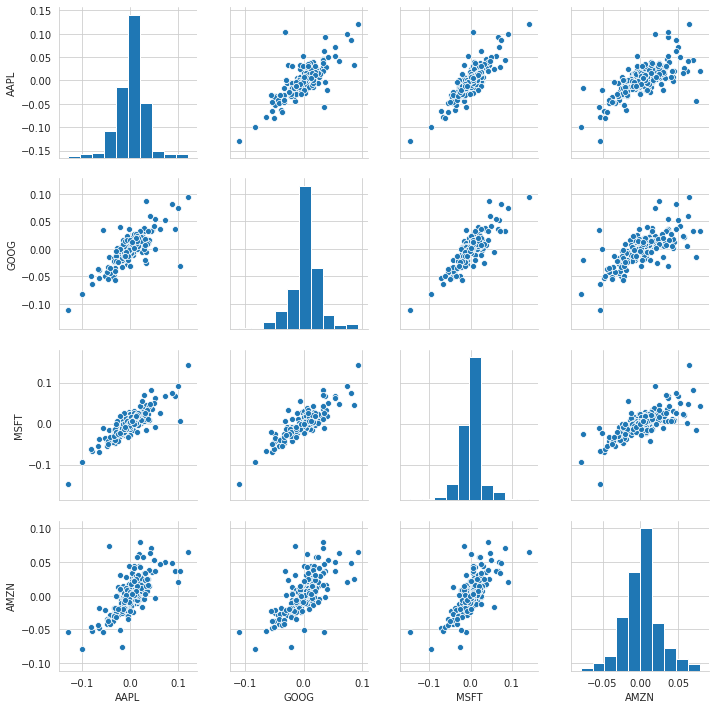

In [35]:
sns.pairplot(tech_rets.dropna())

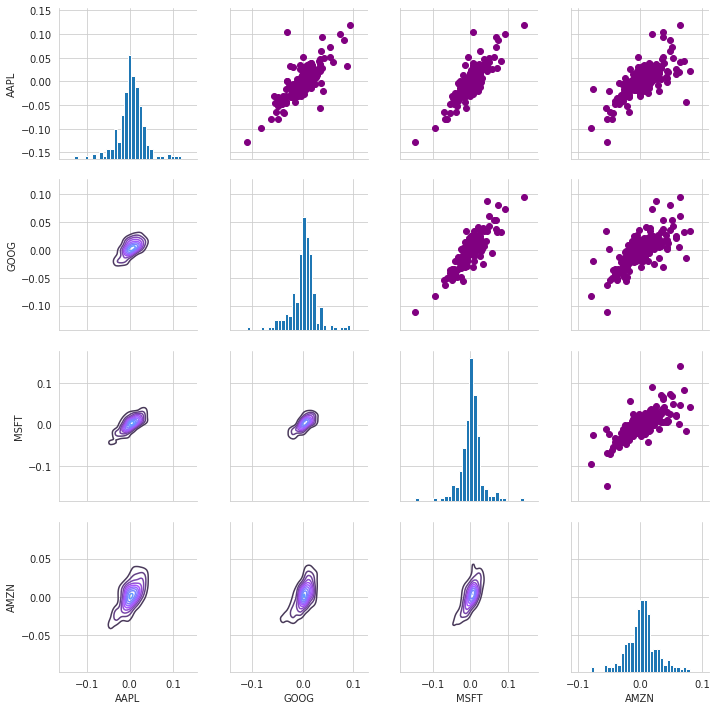

In [37]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

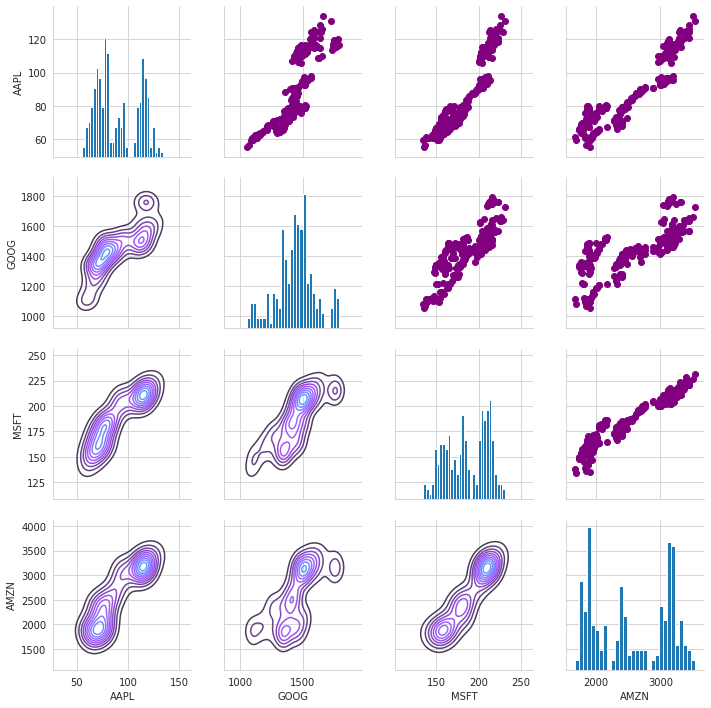

In [38]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

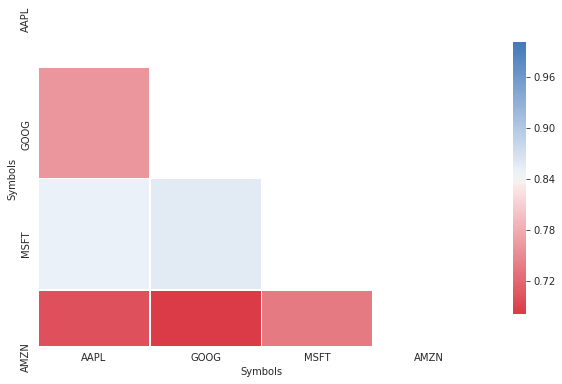

In [45]:
# Compute correlations
corr = tech_rets.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


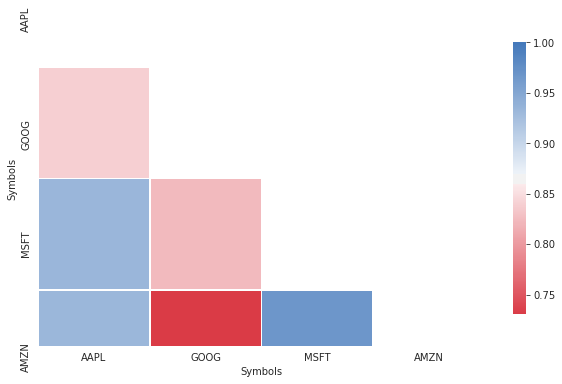

In [46]:
# Compute correlations
corr = closing_df.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


# Risk analysis

In [47]:
rets = tech_rets.dropna()

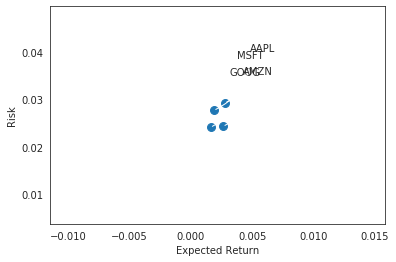

In [49]:
area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# https://matplotlib.org/tutorials/text/annotations.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

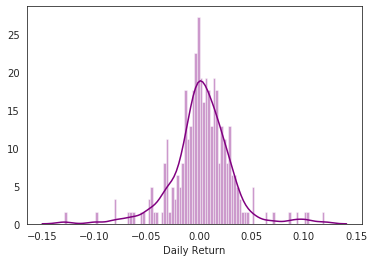

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [52]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-03,-0.017830,0.004155,-0.001605,-0.006533
2019-12-04,0.008826,0.019502,0.003617,-0.005237
2019-12-05,0.014671,0.005748,0.000534,-0.011478
2019-12-06,0.019316,0.009404,0.012139,0.006389
2019-12-09,-0.014000,0.002193,-0.002570,-0.001193


In [53]:
rets['AAPL'].quantile(00.5)

0.002404432393879219

In [54]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [55]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [56]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,1305.829956,1281.000000,1301.000000,1289.920044,1510900,1289.920044
2019-12-03,1298.461060,1279.000000,1279.569946,1295.280029,1143800,1295.280029
2019-12-04,1325.800049,1304.869995,1307.010010,1320.540039,1537500,1320.540039
2019-12-05,1329.358032,1316.439941,1328.000000,1328.130005,1212700,1328.130005
2019-12-06,1344.000000,1333.439941,1333.439941,1340.619995,1314800,1340.619995


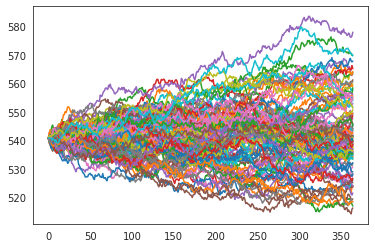

In [57]:
start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

In [58]:
runs = 1000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

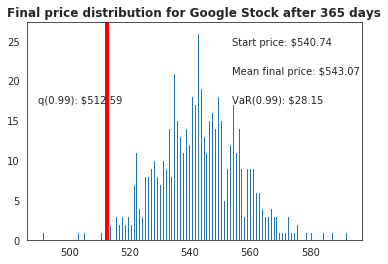

In [61]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, s="Mean final price: $%.2f" %simulations.mean())

plt.figtext(0.6, 0.6, s="VaR(0.99): $%.2f" %(start_price - q,))

plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" %q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')